In [40]:
import numpy as np
import scipy
import csv
import pandas as pd
import imageio
from PIL import Image
import os, sys
import glob
import json
import random
import ipdb
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg

C:\Users\aplus\AppData\Local\Temp\ipykernel_30900\442455601.py:13: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data_R = data - scipy.array([[0.5],[0]])
C:\Users\aplus\AppData\Local\Temp\ipykernel_30900\442455601.py:15: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  R = scipy.array([[np.cos(-theta), -np.sin(-theta)],
C:\Users\aplus\AppData\Local\Temp\ipykernel_30900\442455601.py:19: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data1 = data1 + scipy.array([[0.5], [0]])
C:\Users\aplus\AppData\Local\Temp\ipykernel_30900\442455601.py:13: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data_R = data - scipy.array([[0.5],[0]])
C:\Users\aplus\AppData\Local\Temp\ipykernel_30900\442455601.py:15: DeprecationWarning: scipy.array is deprecated and will be

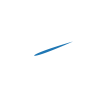

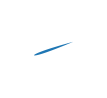

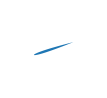

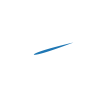

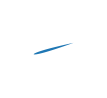

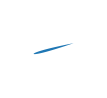

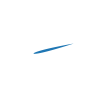

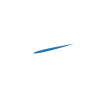

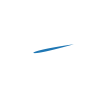

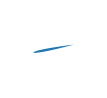

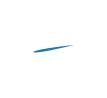

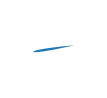

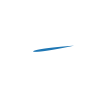

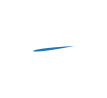

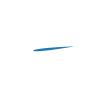

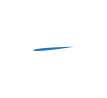

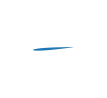

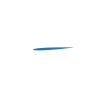

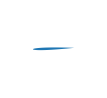

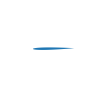

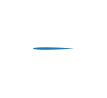

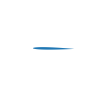

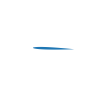

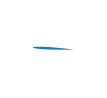

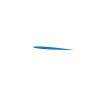

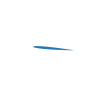

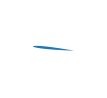

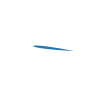

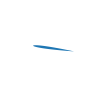

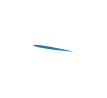

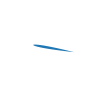

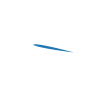

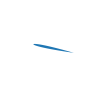

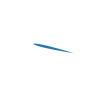

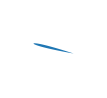

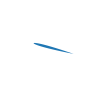

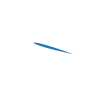

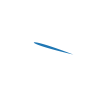

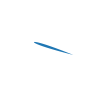

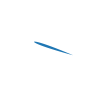

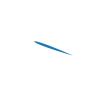

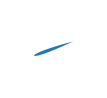

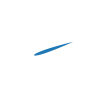

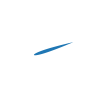

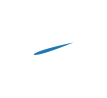

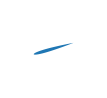

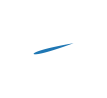

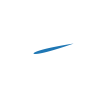

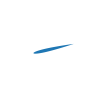

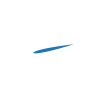

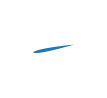

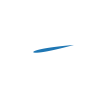

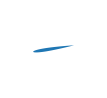

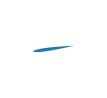

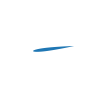

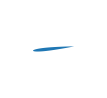

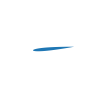

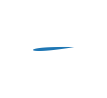

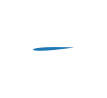

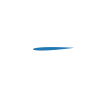

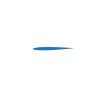

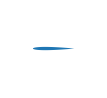

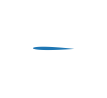

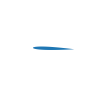

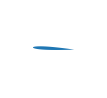

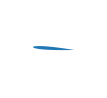

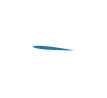

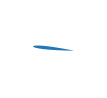

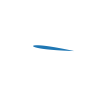

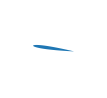

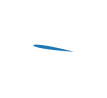

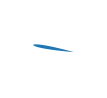

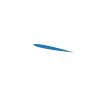

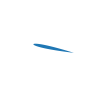

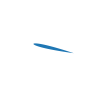

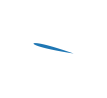

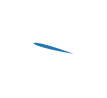

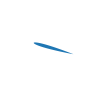

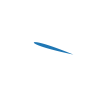

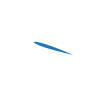

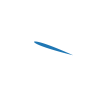

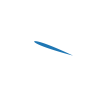

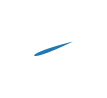

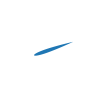

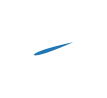

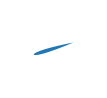

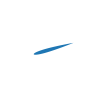

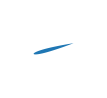

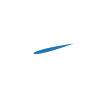

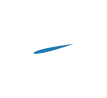

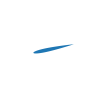

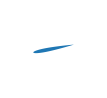

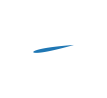

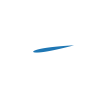

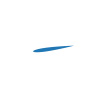

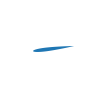

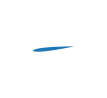

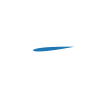

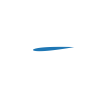

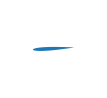

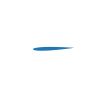

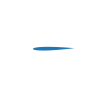

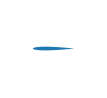

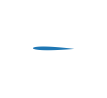

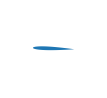

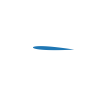

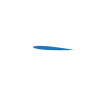

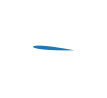

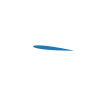

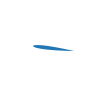

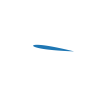

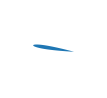

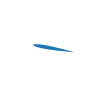

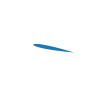

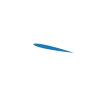

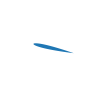

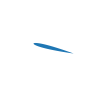

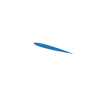

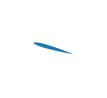

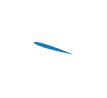

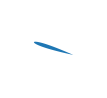

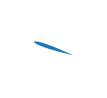

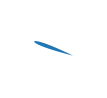

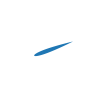

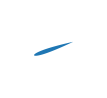

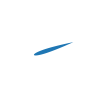

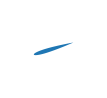

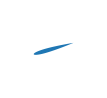

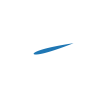

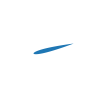

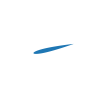

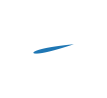

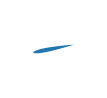

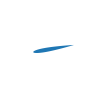

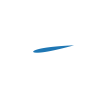

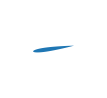

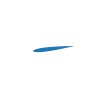

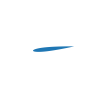

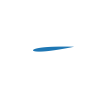

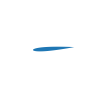

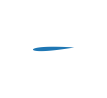

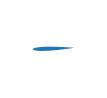

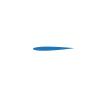

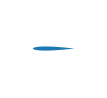

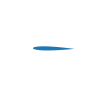

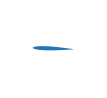

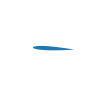

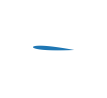

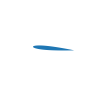

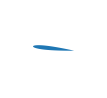

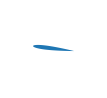

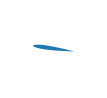

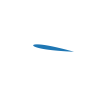

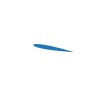

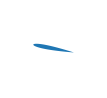

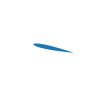

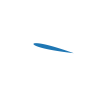

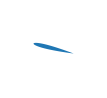

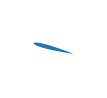

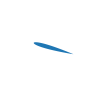

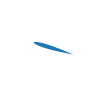

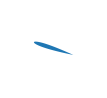

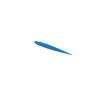

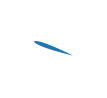

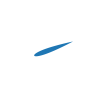

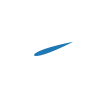

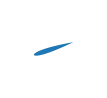

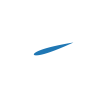

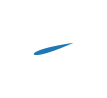

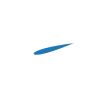

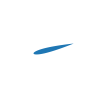

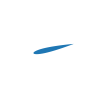

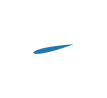

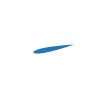

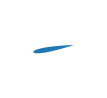

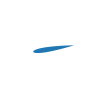

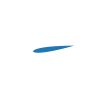

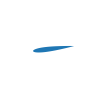

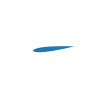

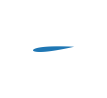

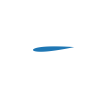

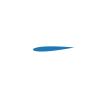

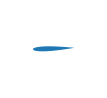

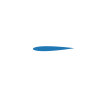

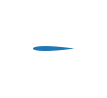

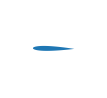

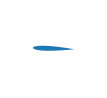

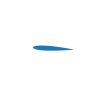

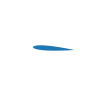

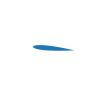

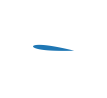

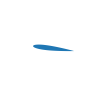

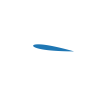

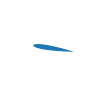

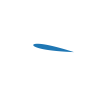

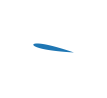

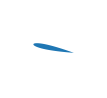

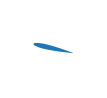

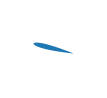

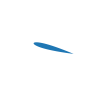

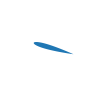

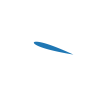

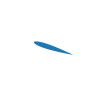

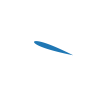

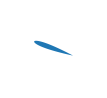

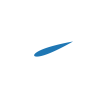

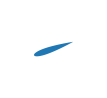

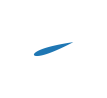

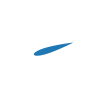

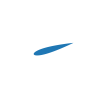

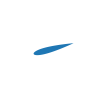

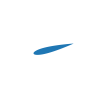

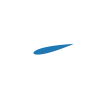

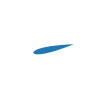

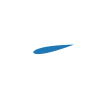

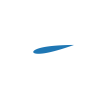

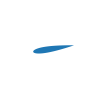

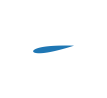

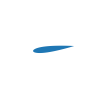

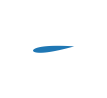

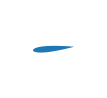

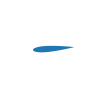

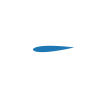

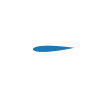

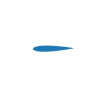

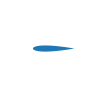

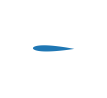

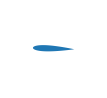

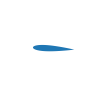

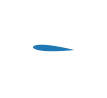

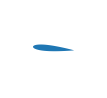

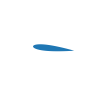

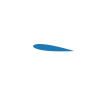

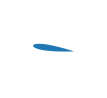

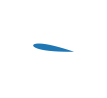

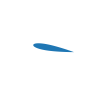

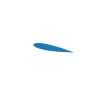

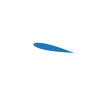

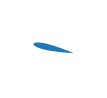

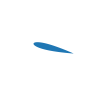

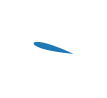

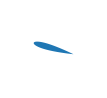

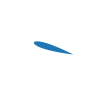

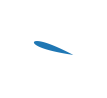

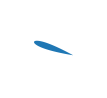

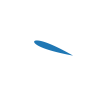

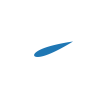

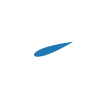

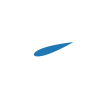

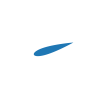

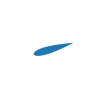

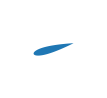

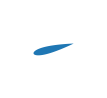

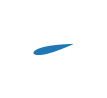

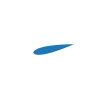

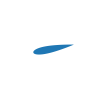

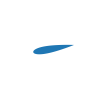

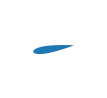

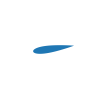

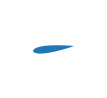

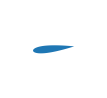

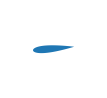

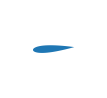

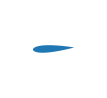

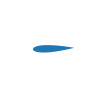

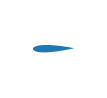

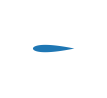

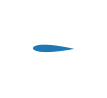

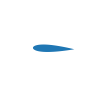

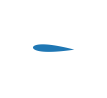

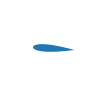

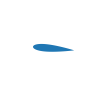

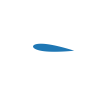

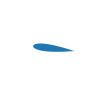

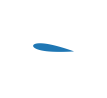

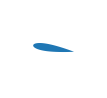

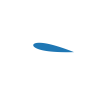

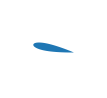

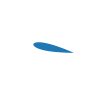

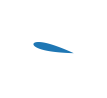

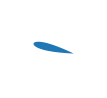

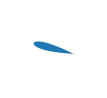

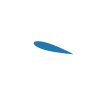

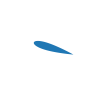

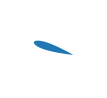

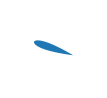

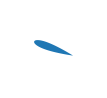

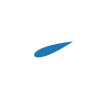

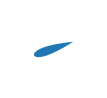

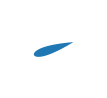

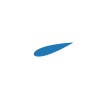

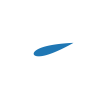

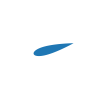

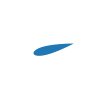

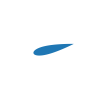

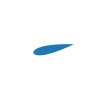

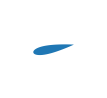

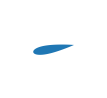

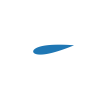

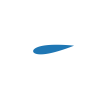

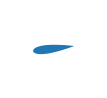

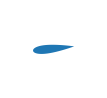

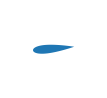

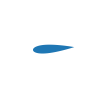

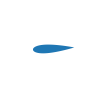

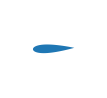

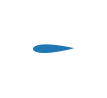

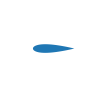

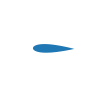

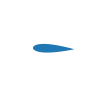

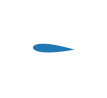

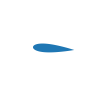

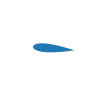

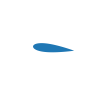

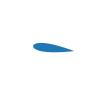

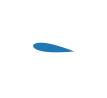

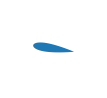

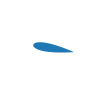

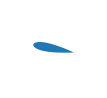

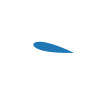

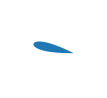

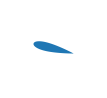

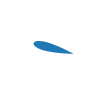

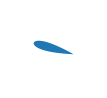

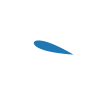

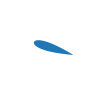

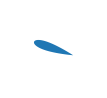

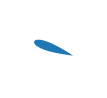

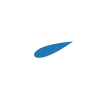

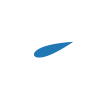

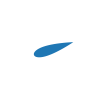

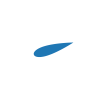

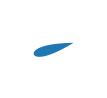

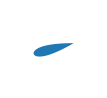

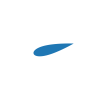

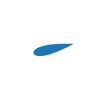

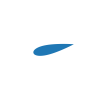

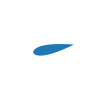

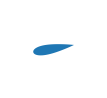

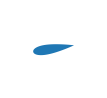

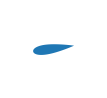

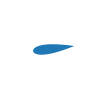

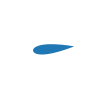

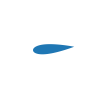

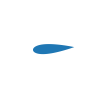

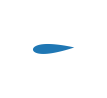

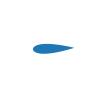

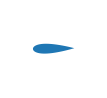

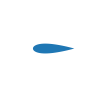

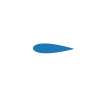

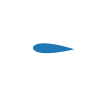

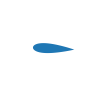

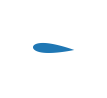

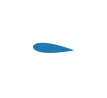

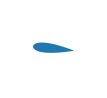

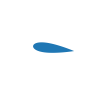

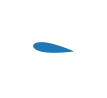

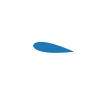

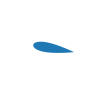

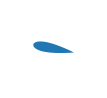

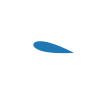

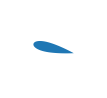

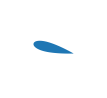

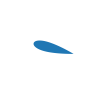

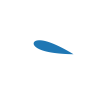

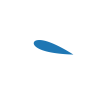

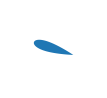

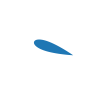

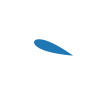

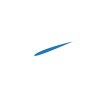

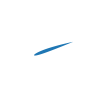

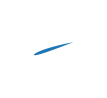

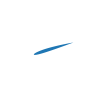

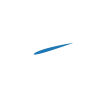

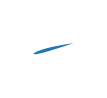

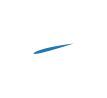

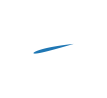

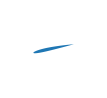

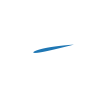

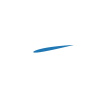

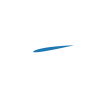

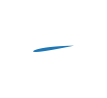

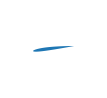

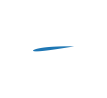

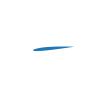

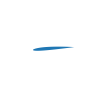

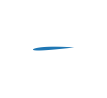

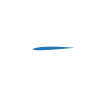

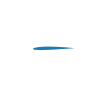

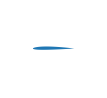

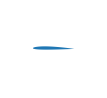

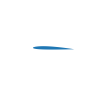

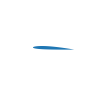

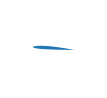

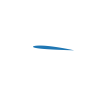

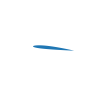

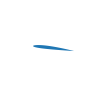

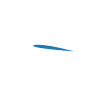

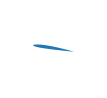

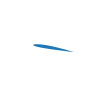

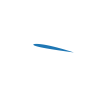

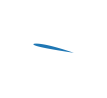

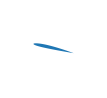

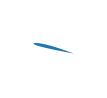

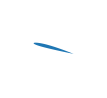

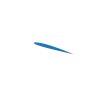

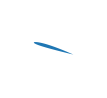

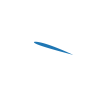

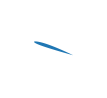

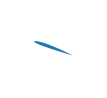

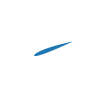

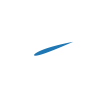

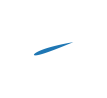

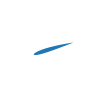

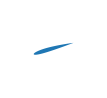

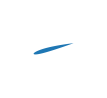

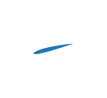

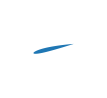

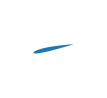

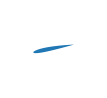

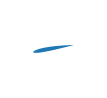

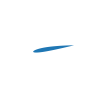

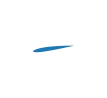

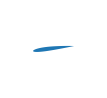

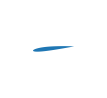

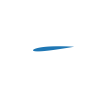

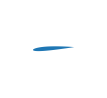

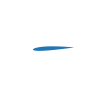

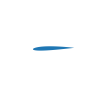

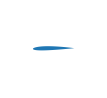

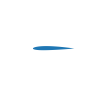

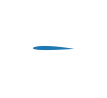

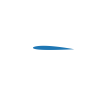

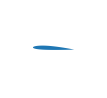

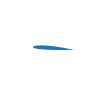

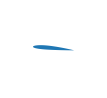

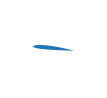

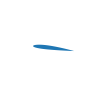

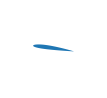

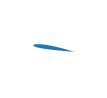

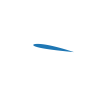

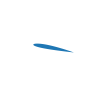

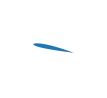

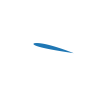

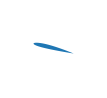

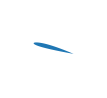

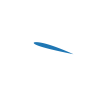

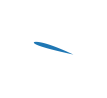

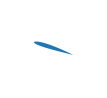

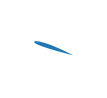

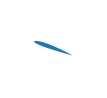

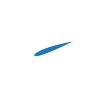

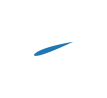

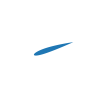

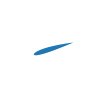

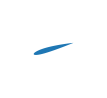

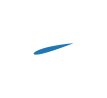

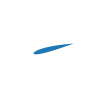

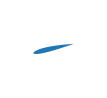

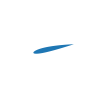

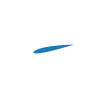

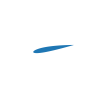

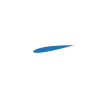

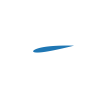

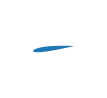

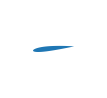

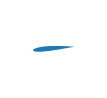

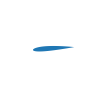

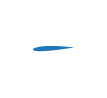

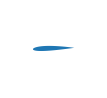

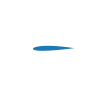

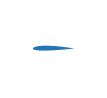

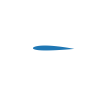

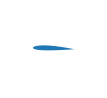

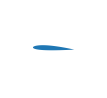

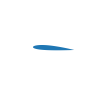

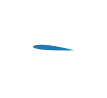

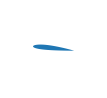

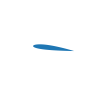

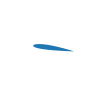

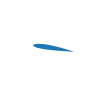

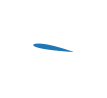

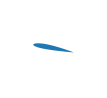

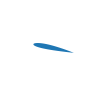

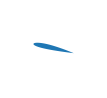

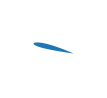

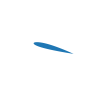

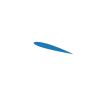

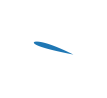

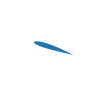

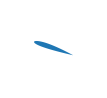

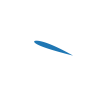

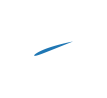

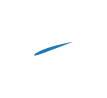

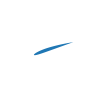

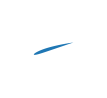

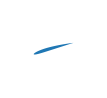

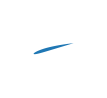

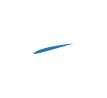

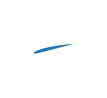

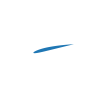

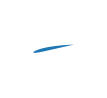

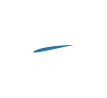

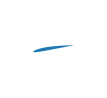

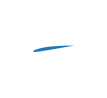

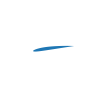

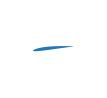

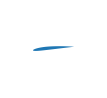

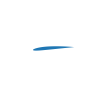

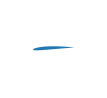

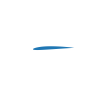

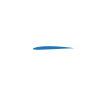

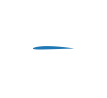

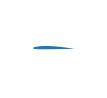

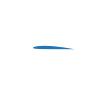

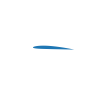

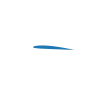

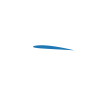

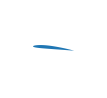

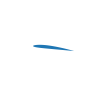

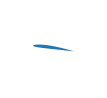

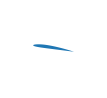

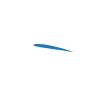

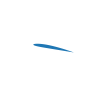

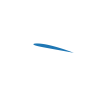

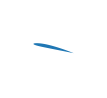

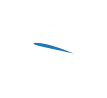

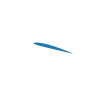

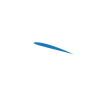

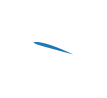

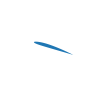

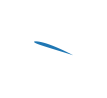

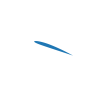

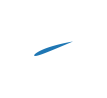

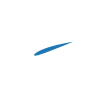

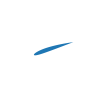

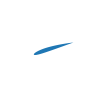

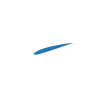

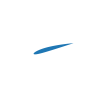

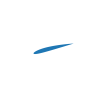

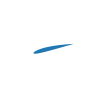

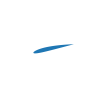

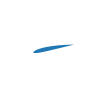

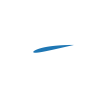

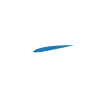

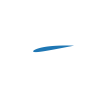

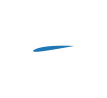

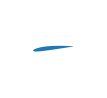

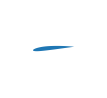

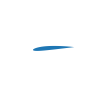

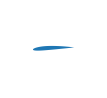

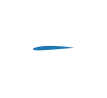

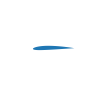

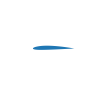

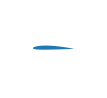

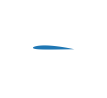

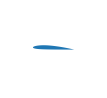

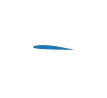

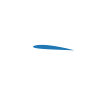

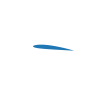

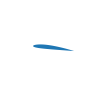

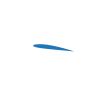

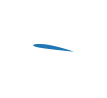

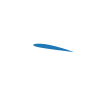

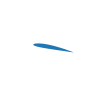

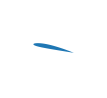

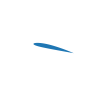

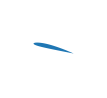

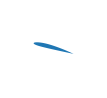

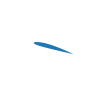

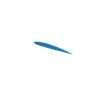

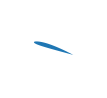

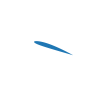

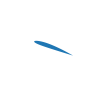

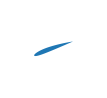

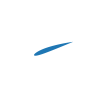

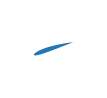

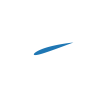

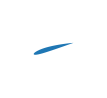

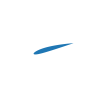

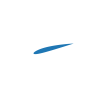

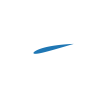

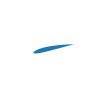

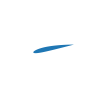

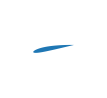

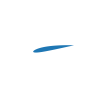

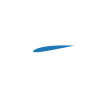

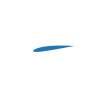

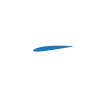

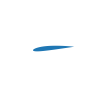

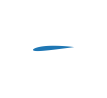

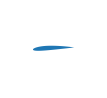

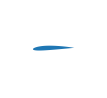

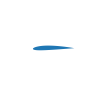

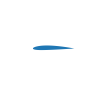

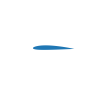

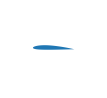

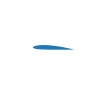

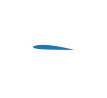

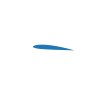

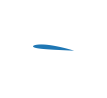

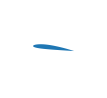

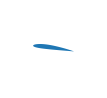

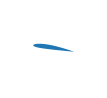

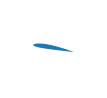

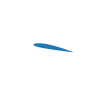

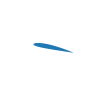

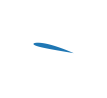

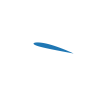

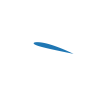

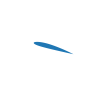

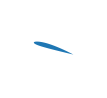

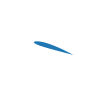

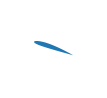

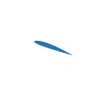

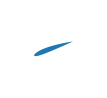

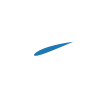

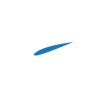

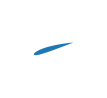

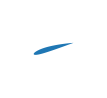

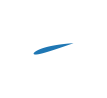

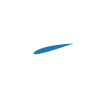

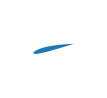

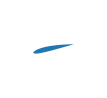

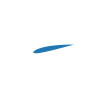

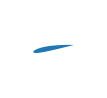

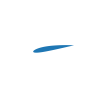

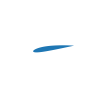

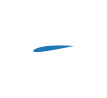

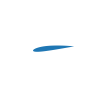

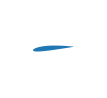

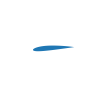

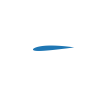

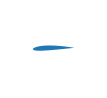

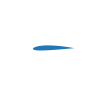

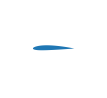

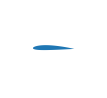

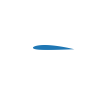

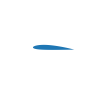

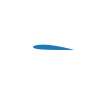

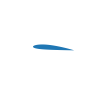

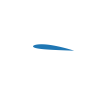

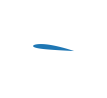

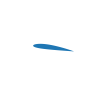

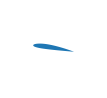

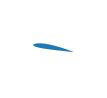

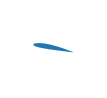

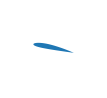

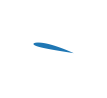

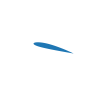

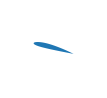

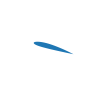

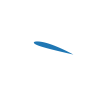

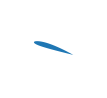

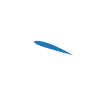

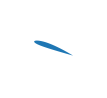

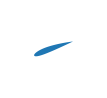

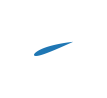

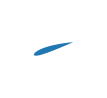

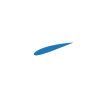

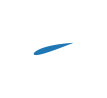

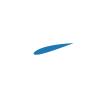

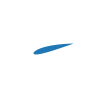

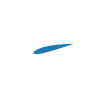

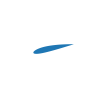

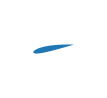

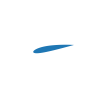

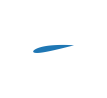

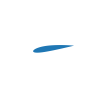

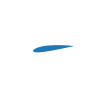

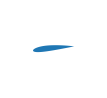

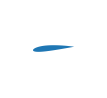

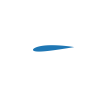

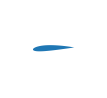

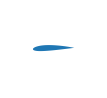

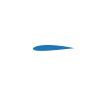

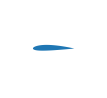

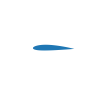

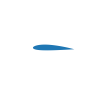

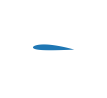

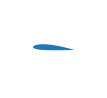

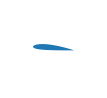

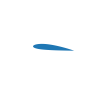

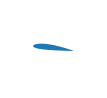

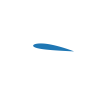

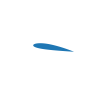

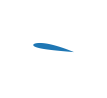

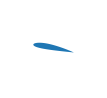

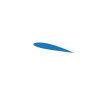

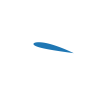

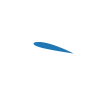

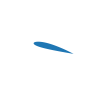

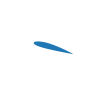

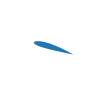

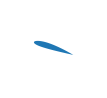

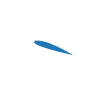

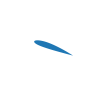

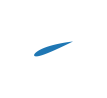

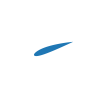

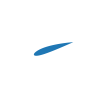

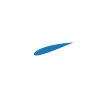

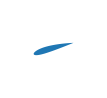

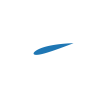

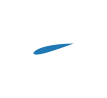

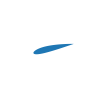

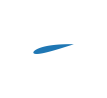

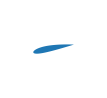

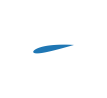

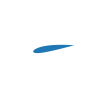

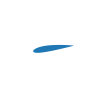

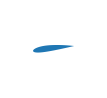

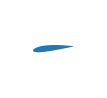

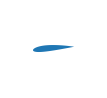

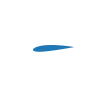

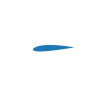

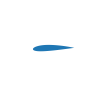

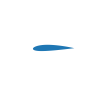

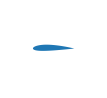

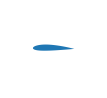

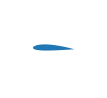

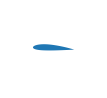

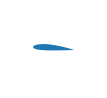

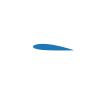

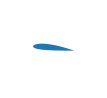

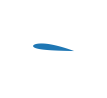

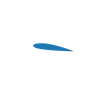

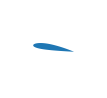

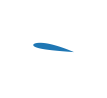

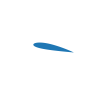

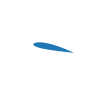

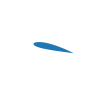

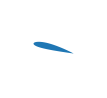

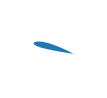

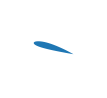

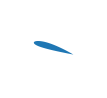

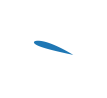

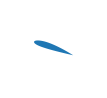

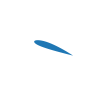

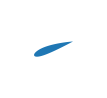

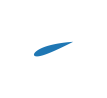

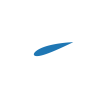

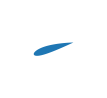

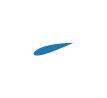

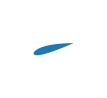

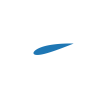

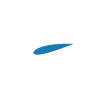

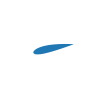

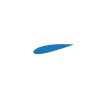

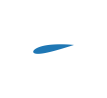

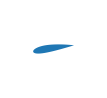

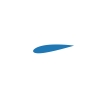

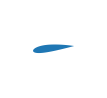

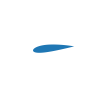

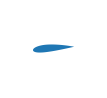

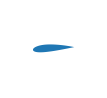

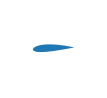

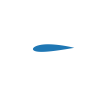

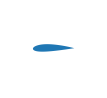

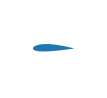

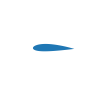

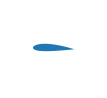

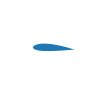

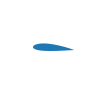

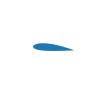

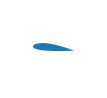

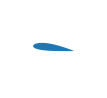

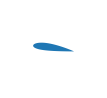

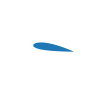

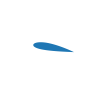

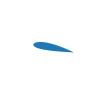

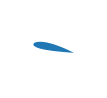

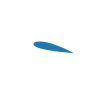

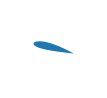

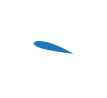

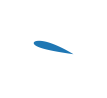

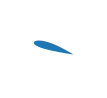

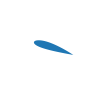

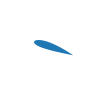

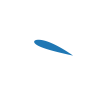

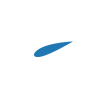

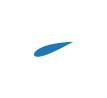

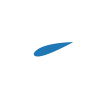

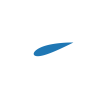

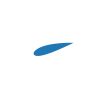

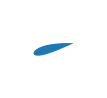

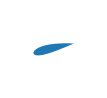

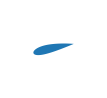

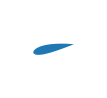

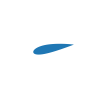

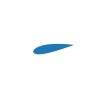

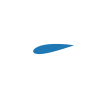

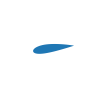

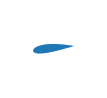

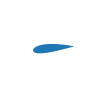

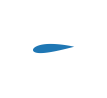

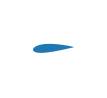

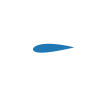

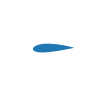

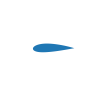

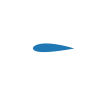

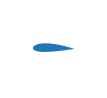

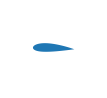

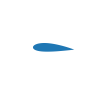

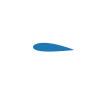

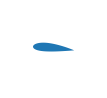

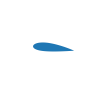

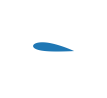

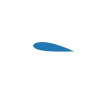

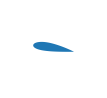

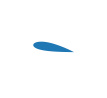

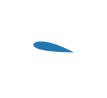

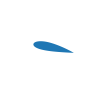

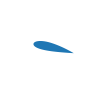

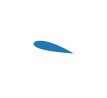

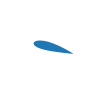

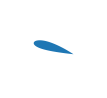

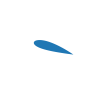

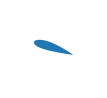

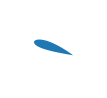

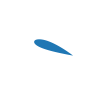

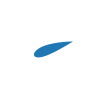

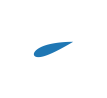

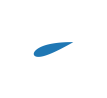

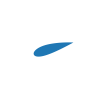

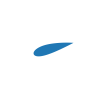

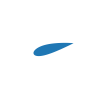

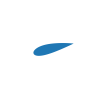

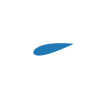

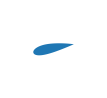

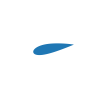

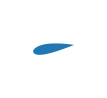

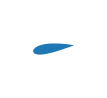

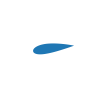

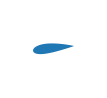

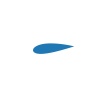

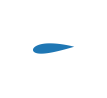

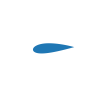

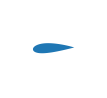

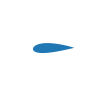

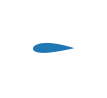

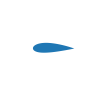

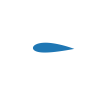

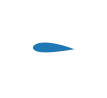

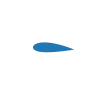

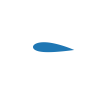

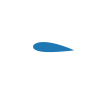

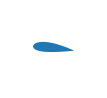

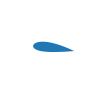

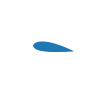

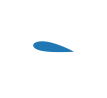

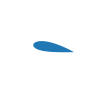

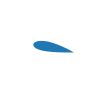

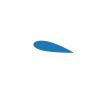

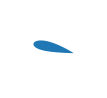

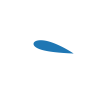

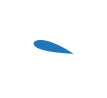

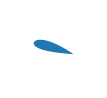

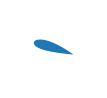

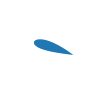

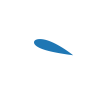

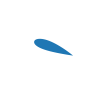

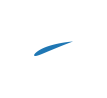

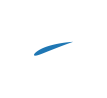

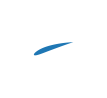

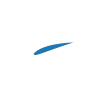

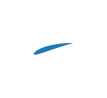

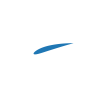

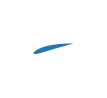

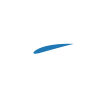

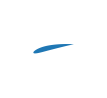

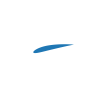

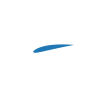

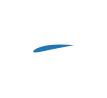

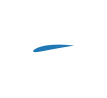

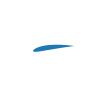

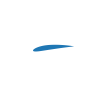

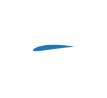

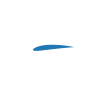

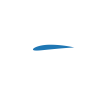

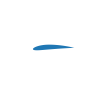

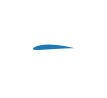

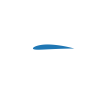

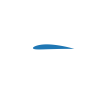

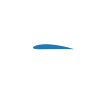

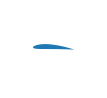

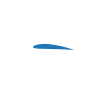

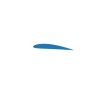

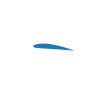

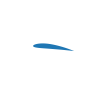

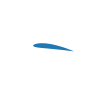

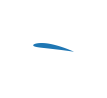

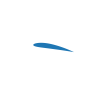

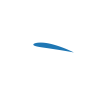

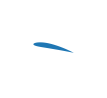

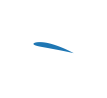

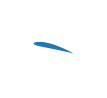

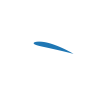

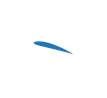

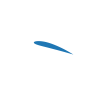

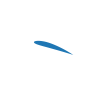

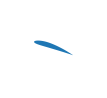

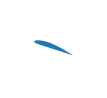

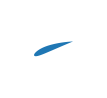

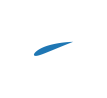

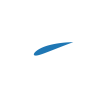

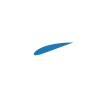

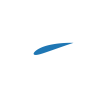

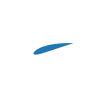

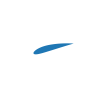

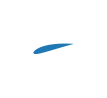

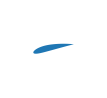

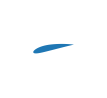

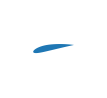

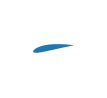

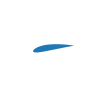

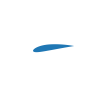

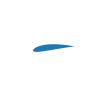

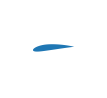

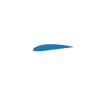

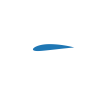

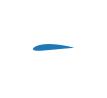

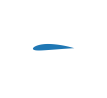

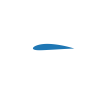

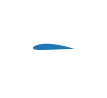

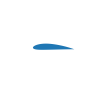

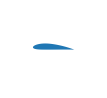

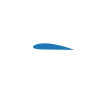

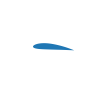

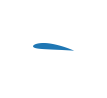

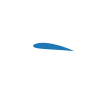

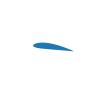

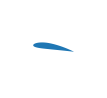

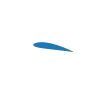

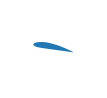

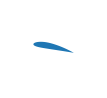

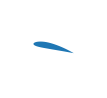

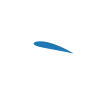

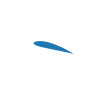

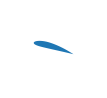

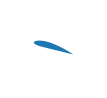

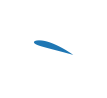

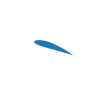

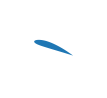

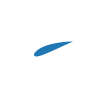

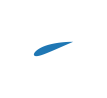

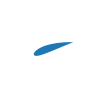

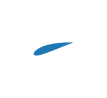

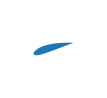

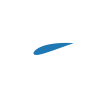

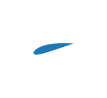

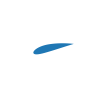

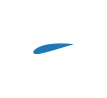

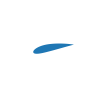

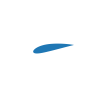

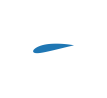

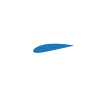

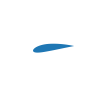

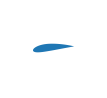

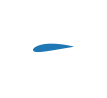

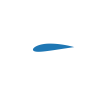

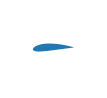

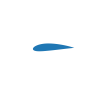

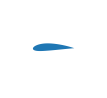

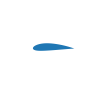

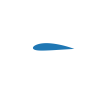

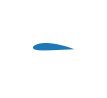

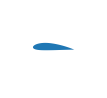

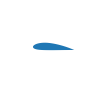

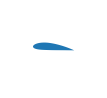

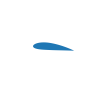

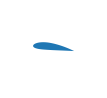

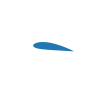

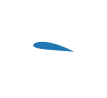

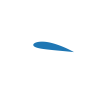

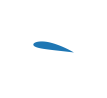

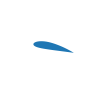

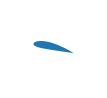

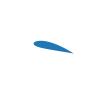

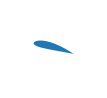

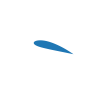

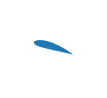

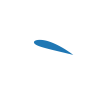

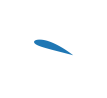

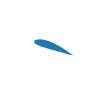

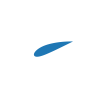

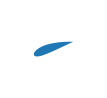

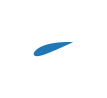

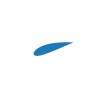

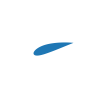

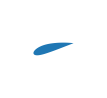

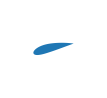

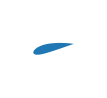

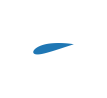

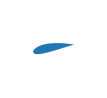

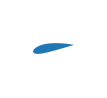

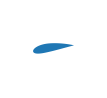

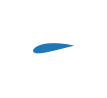

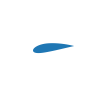

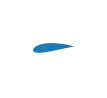

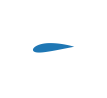

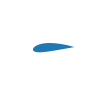

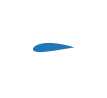

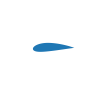

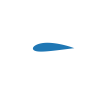

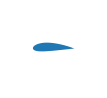

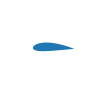

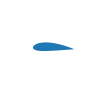

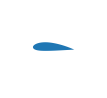

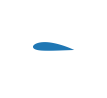

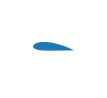

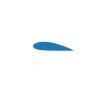

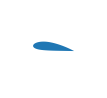

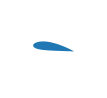

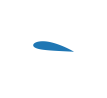

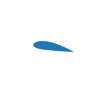

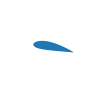

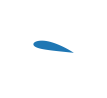

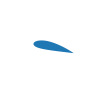

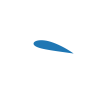

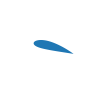

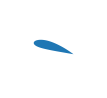

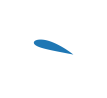

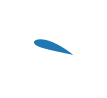

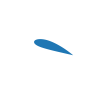

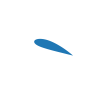

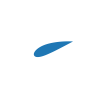

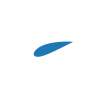

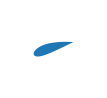

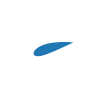

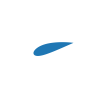

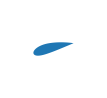

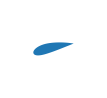

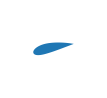

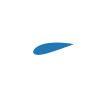

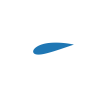

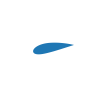

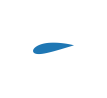

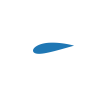

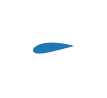

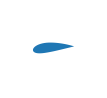

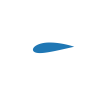

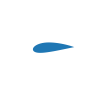

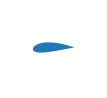

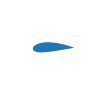

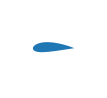

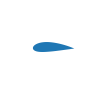

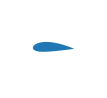

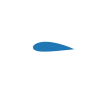

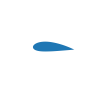

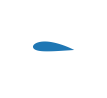

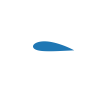

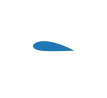

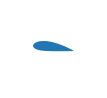

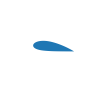

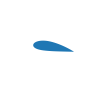

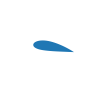

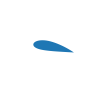

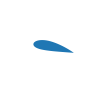

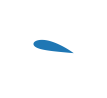

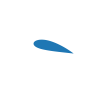

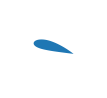

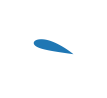

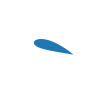

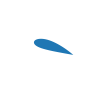

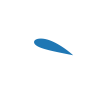

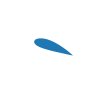

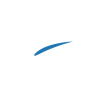

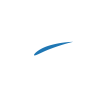

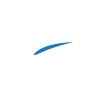

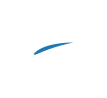

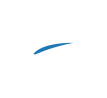

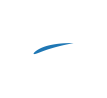

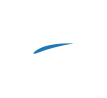

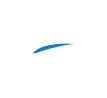

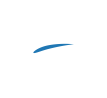

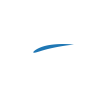

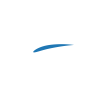

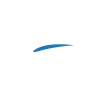

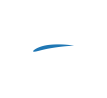

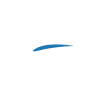

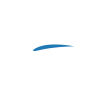

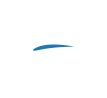

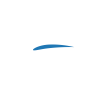

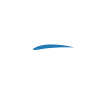

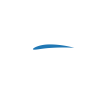

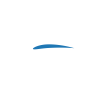

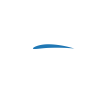

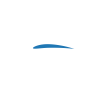

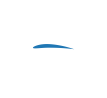

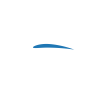

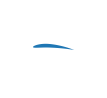

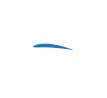

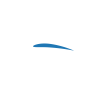

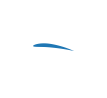

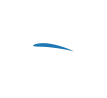

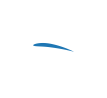

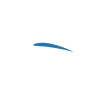

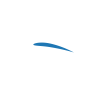

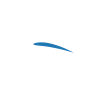

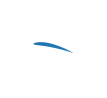

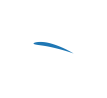

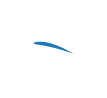

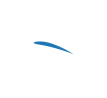

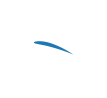

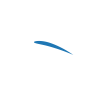

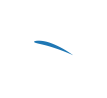

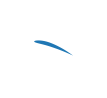

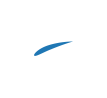

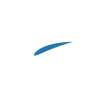

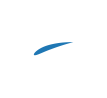

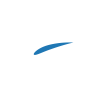

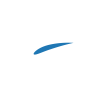

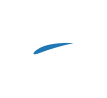

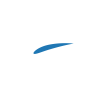

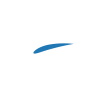

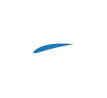

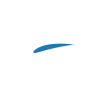

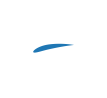

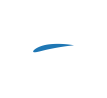

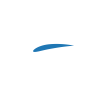

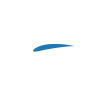

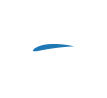

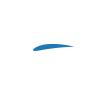

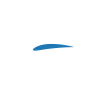

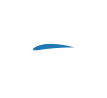

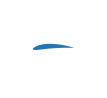

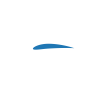

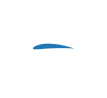

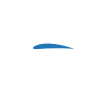

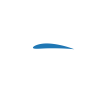

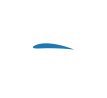

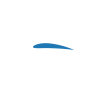

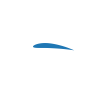

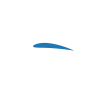

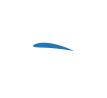

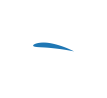

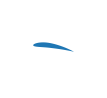

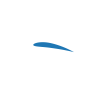

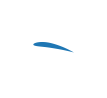

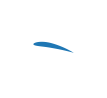

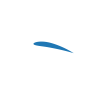

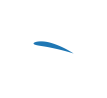

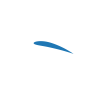

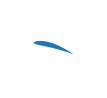

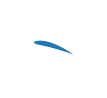

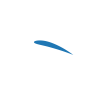

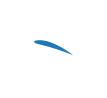

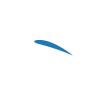

In [26]:
filepath_naca = [os.path.basename(x) for x in glob.glob('./naca_data_geometry/*.txt')]
list_naca = [i.rsplit('.',1)[0] for i in filepath_naca]
set_dpi = 288


for file in list_naca:
    data = np.loadtxt('./naca_data_geometry/%s.txt' % (file), skiprows = 1)
    data = data.T
    
    for alpha in range(-20,21):
        theta = alpha*np.pi/180
        
        data_R = data - scipy.array([[0.5],[0]])
        
        R = scipy.array([[np.cos(-theta), -np.sin(-theta)],
                       [np.sin(-theta), np.cos(-theta)]])
        data1 = R@data_R
        
        data1 = data1 + scipy.array([[0.5], [0]])
        X = data1[0,:]
        Y = data1[1,:]
        
        plt.figure(figsize = (64/set_dpi,64/set_dpi), dpi = set_dpi)
        plt.fill(X,Y)
        plt.axis('off')
        plt.xlim(-0.1,1.1)
        plt.ylim(-0.5,0.5)
        plt.gca().set_aspect('equal')
        plt.savefig('./naca_imgs/%s_%s.png' % (file,alpha), dpi = set_dpi)
        plt.close
        
        image = Image.open('./naca_imgs/%s_%s.png' % (file,alpha)).convert('L')
        image.save('./naca_imgs/%s_%s.png' % (file,alpha))

In [46]:
R_e_key = np.linspace(5,757,17)
R_e_dict = {}

lines_idx = list()
for key in R_e_key:
    for i in range(41):
        lines_idx.append(key+i)
for idx,key in enumerate(R_e_key):
    R_e_dict[key] = 30000 + idx*400000

filepath_naca = [os.path.basename(x) for x in glob.glob('./naca_raw_data/*.txt')]
list_naca = [i.rsplit('.', 1)[0] for i in filepath_naca]

name = list()
R_e_list = list()
alpha_list = list()
cl_list =list()
cd_list = list()
ld_ratio_list = list()

for file in list_naca:
    data = open('./naca_raw_data/%s.txt' % file)
    k = 0
    for idx, line in enumerate(data):
        if idx in lines_idx:
            if k == 41:
                k = 0
            wordlist = line.split()
            name.append('NACA' + file)
            R_e_list.append(R_e_dict[idx-k])
            alpha_list.append(wordlist[0])
            cl_list.append(wordlist[1])
            cd_list.append(wordlist[2])
            ld_ratio_list.append(wordlist[8])
            k += 1
            
data_np = np.column_stack((np.array(name),np.array(R_e_list),np.array(alpha_list),np.array(cl_list),np.array(cd_list),np.array(ld_ratio_list)))
np.save('feature_data', data_np)
pd.DataFrame(data_np).to_csv('./feature_data.csv')